# Homework #2:
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/9/2020|

## Quadratic Roots

The roots of a quadratic polynomial,

\begin{equation}
ax^2 + bx + c, \quad a\neq0,
\tag{1}
\end{equation}

can be found analytically with either of the following two formulas:

\begin{equation}
x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a},
\tag{2}
\end{equation}

\begin{equation}
x^\prime_{1,2} = \frac{-2c}{b \pm \sqrt{b^2 - 4ac}},
\tag{3}
\end{equation}

where
\begin{equation}
b^2 - 4ac
\tag{4}
\end{equation}

is the ***discriminant***. A quadratic polynomial, with _real_ coefficients $a, b,$ and $c$, has two distinct real roots if the discriminant is positive and two complex roots if it is negative. The two roots are equal if and only if the discriminant is zero.

### A. Functions to Calculate
Let's first write two separate functions to calculate and return the real quadratic roots given by Eqs. 2 and 3.

In [1]:
import math

def quadroots1(c):
    """
    Return the real roots of a quadratic with real coefficients given in c (see Eq. 2).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    
    Examples
    --------
    >>> coeff = [1, 0, -1]
    >>> quadroots1(coeff)
    [1.0, -1.0]
    """
    if len(c) != 3:
        raise ValueError("Input must be a rank-1 array with length 3.")
    elif c[0] == 0:
        raise ValueError("Second-degree coefficient, a, cannot be 0.")
    else:
        a, b, c = c[0], c[1], c[2] # store coefficients
        disc = b*b - 4*a*c         # discriminant
        
        if disc < 0:
            raise ValueError("Discriminant negative (complex roots).")
        
        x = (-b + math.sqrt(disc))/2/a
        roots = [x]
        if disc > 0:               # two distinct real roots       
            x = (-b - math.sqrt(disc))/2/a
            roots.append(x)
        return roots

In [2]:
import math

def quadroots2(c):
    """
    Return the real roots of a quadratic with real coefficients given in c (see Eq. 3).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    
    Examples
    --------
    >>> coeff = [1, 0, -1]
    >>> quadroots2(coeff)
    [1.0, -1.0]
    """
    if len(c) != 3:
        raise ValueError("Input must be a rank-1 array with length 3.")
    elif c[0] == 0:
        raise ValueError("Second-degree coefficient, a, cannot be 0.")
    else:
        a, b, c = c[0], c[1], c[2] # store coefficients
        disc = b*b - 4*a*c         # discriminant
        
        if disc < 0:
            raise ValueError("Discriminant negative (complex roots).")
        elif disc == 0 and b == 0:
            return [0]             # avoid division by zero
        else:
            x = -2*c/(b + math.sqrt(disc))
            roots = [x]
            if disc > 0:               # two distinct real roots       
                x = -2*c/(b - math.sqrt(disc))
                roots.append(x)
            return roots

We can test these solvers out with a simple example. First let's graph

\begin{equation}
f(x) = x^2 - 1,
\tag{5}
\end{equation}

where our quadratic coefficients (Eq. 1) are

\begin{align*}
a &= 1\\
b &= 0\\
c &= -1.
\end{align*}

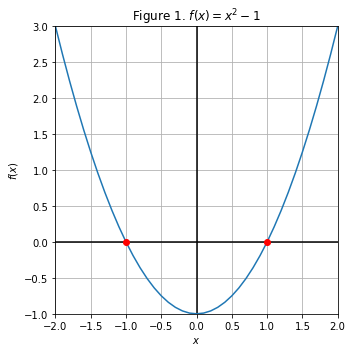

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x*x - 1
x = np.arange(-2, 2.1, 0.1)

plt.figure(figsize=[5,5])
plt.title(r'Figure 1. $f(x) = x^2 - 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.axhline(color='k')
plt.axvline(color='k')
plt.grid()
plt.plot(x, f(x))
plt.plot(-1.,0, 'or')
plt.plot(1.,0, 'or')
plt.xlim([-2,2])
plt.ylim([-1,3])
plt.tight_layout()
plt.show()

As we can see, we expect to find roots at $x=-1$ and $x=1$. Now let's try our new solvers to verify they're working correctly.

In [4]:
# declare coeff's
coeff = [1, 0, -1]
print("Eq. 2 roots at x  =", quadroots1(coeff))
print("Eq. 3 roots at x' =", quadroots2(coeff))

Eq. 2 roots at x  = [1.0, -1.0]
Eq. 3 roots at x' = [1.0, -1.0]


So far so good.

### B. Error Investigation
Careful inspection of Eqs. 2 and 3 reveals a potential source of significant error due to _substractive cancellation_ in the limit where $b^2 \gg 4ac$. For example&mdash;depending on the root&mdash;we effectively find in the numerator and denominator of Eqs. 2 and 3 respectively,

\begin{align*}
b - \sqrt{b^2 - 4ac} &= \lim_{c \rightarrow 0} b - \sqrt{b^2}\\
&= \lim_{c \rightarrow 0} b - b.
\end{align*}

We can get a handle on how substantial this error can become as the subtractive cancelation begins to dominate; for example, when $a=1, b=1, c=10^{-n}$, $n \in \mathbb{N^*}$, for successively larger $n$. But in order to quantify this error due to subtractive cancellation, we first need a methodology for calculating the _exact_ difference.

#### Binomial Series
If $k$ is any number and $|x| < 1$ then,

\begin{align*}
{\left( {1 + x} \right)^k} & = \sum\limits_{n = 0}^\infty  { {k \choose n} {x^n}} \,\\ &  = 1 + kx + \frac{{k\left( {k - 1} \right)}}{{2!}}{x^2} + \frac{{k\left( {k - 1} \right)\left( {k - 2} \right)}}{{3!}}{x^3} +  \cdots,
\tag{6}
\end{align*}

where the _binomial coefficient_ is given by

\begin{align*}
{k \choose n} & = \frac{{k\left( {k - 1} \right)\left( {k - 2} \right) \cdots \left( {k - n + 1} \right)}}{{n!}}\hspace{0.25in}n = 1,2,3, \ldots \\ {k \choose 0} & = 1.
\end{align*}

For Eqs. 2 and 3, we can re-express the square root of the discriminant as Eq. 6, with $b = b^2 = 1$, $-4ac = x$, and $1/2 = k$, as

\begin{align*}
{\left( {1 + x} \right)^{1/2}} & = \sum\limits_{n = 0}^\infty  { {1/2 \choose n} {x^n}} \,\\ &  = 1 + \frac{1}{2}x + \frac{{\frac{1}{2}\left( {\frac{1}{2} - 1} \right)}}{{2!}}{x^2} + \frac{{\frac{1}{2}\left( {\frac{1}{2} - 1} \right)\left( {\frac{1}{2} - 2} \right)}}{{3!}}{x^3} +  \cdots\\
&  = 1 + \frac{1}{2}x - \frac{1}{8}{x^2} + \frac{3}{48}{x^3} +  \cdots,
\tag{7}
\end{align*}

where,

\begin{align*}
{1/2 \choose n} & = \frac{{\frac{1}{2}\left( {\frac{1}{2} - 1} \right)\left( {\frac{1}{2} - 2} \right) \cdots \left( {\frac{1}{2} - n + 1} \right)}}{{n!}}\hspace{0.25in}n = 1,2,3, \ldots \\
\end{align*}

In fact, this is one way to calculate&mdash;or more precisely, _approximate_&mdash;the square root of a number to machine precision.

#### Bonus: Binomial Series Calculator
We can write a short script to finitely sum the terms in Eq. 6 to an arbitrary _n_ number of successively higher order terms.

In [5]:
from scipy.special import binom # use to calculate binomial coefficient

def binom_series(x,k,n):
    """
    Return the finite sum of n-order terms in the binomial series expansion of (1 + x)^k (see Eq. 6).
    
    Parameters
    ----------
    x : float
        The value of x in the binomial series.
        |x| must be less than 1 for the series to converge.
    k : float
        Exponent k of the binomial series.
    n : int
        Number of n-order terms to sum.
    
    Returns
    -------
    Sum : float
        The sum of n-order terms in the binomial series (1 + x)^k
    """
    Sum, term = 0, 0
    for i in range(0, n+1):
        term = binom(k,i)*x**i
        Sum += term
        print(i,"th-order term:", term, "\t sum=", Sum)
    return Sum

Thus, for example, if our coefficients are $a=1, b=1,$ and $c=10^{-1}=\frac{1}{10}$, then in Eq. 7,

\begin{align*}
x &= -4(1)\left(\frac{1}{10}\right)\\
&= -\frac{4}{10}\\
&= -\frac{2}{5},
\end{align*}

and the square root of the discriminant becomes

\begin{align*}
{\left( {1 - \frac{2}{5}} \right)^{1/2}} &= 1 + \frac{1}{2}\left(-\frac{2}{5}\right) - \frac{1}{8}{\left(-\frac{2}{5}\right)^2} + \frac{3}{48}{\left(-\frac{2}{5}\right)^3} -  \cdots\\
&= 1 - \frac{1}{5} - \frac{1}{50} - \frac{1}{250} +  \cdots\\
&\approx 0.776
\end{align*}

Trying this out with our new calculator out to 34 terms...

In [6]:
binom_series(-.4, .5, 34)

0 th-order term: 1.0 	 sum= 1.0
1 th-order term: -0.2 	 sum= 0.8
2 th-order term: -0.020000000000000004 	 sum= 0.78
3 th-order term: -0.004000000000000001 	 sum= 0.776
4 th-order term: -0.0010000000000000002 	 sum= 0.775
5 th-order term: -0.0002800000000000001 	 sum= 0.7747200000000001
6 th-order term: -8.400000000000004e-05 	 sum= 0.7746360000000001
7 th-order term: -2.6400000000000008e-05 	 sum= 0.7746096000000001
8 th-order term: -8.580000000000004e-06 	 sum= 0.7746010200000001
9 th-order term: -2.8600000000000014e-06 	 sum= 0.77459816
10 th-order term: -9.724000000000006e-07 	 sum= 0.7745971876000001
11 th-order term: -3.359200000000002e-07 	 sum= 0.77459685168
12 th-order term: -1.1757200000000007e-07 	 sum= 0.774596734108
13 th-order term: -4.1602400000000026e-08 	 sum= 0.7745966925056
14 th-order term: -1.4858000000000011e-08 	 sum= 0.7745966776476
15 th-order term: -5.348880000000004e-09 	 sum= 0.77459667229872
16 th-order term: -1.9389690000000017e-09 	 sum= 0.774596670359751


0.7745966692414832

Since

\begin{align*}
{\left( {1 - \frac{2}{5}} \right)^{1/2}} &= {\left( {\frac{3}{5}} \right)^{1/2}}\\
&= \sqrt{0.6},
\end{align*}

let's compare our result with Python's built-in `math` function.

In [7]:
import math

math.sqrt(.6)

0.7745966692414834

Without looking at the source code for the `math.sqrt` method, we can see that a binomial series expansion out to machine precision is likely one method for calculating square roots.

#### Consistent Theoretical Values
This slight diversion shows us that the use of `math.sqrt` in our `quadroots1` and `quadroots2` already yields values as accurate as machine precision will allow for the binomial series. But to quantify the relative error due to subtractive cancellation when $a=1, b=1, c=10^{-n}$, $n \in \mathbb{N^*}$, for successively larger $n$, we need to define _finite, theoretical_ values for the roots with which to compare.

If $x_{th}$ is the theoretical value of a quadratic root, and $x_c$ is the computed root, then the _absolute error_ is defined as

$$
\Delta \equiv |x_{th} - x_c|
$$

and the _relative error_ as

$$
\epsilon \equiv \frac{\Delta}{|x_{th}|}.
$$

The simplest, finite value for a theoretical quadratic root can be arrived at by taking the _first-order_ binomial series expansion of the square root of the discriminant. With $a=1, b=1$, from Eqs. 4 and 7,

\begin{align*}
\sqrt{1-4c} &= (1 - 4c)^{1/2}\\
&= 1 - \frac{1}{2}{4c}\\
&= 1 - 2c, \quad (c < 1)
\tag{8}
\end{align*}

Plugging this back into Eqs. 2 and 3, our "theoretical" roots (for $c < 1$) become

\begin{align*}
x_1 &= \frac{-1 + (1 - 2c)}{2} = -c \tag{9}\\
x_2 &= \frac{-1 - (1 - 2c)}{2} = c - 1 \tag{10}\\
x^\prime_1 &= \frac{-2c}{1 + (1 - 2c)} = \frac{-c}{1-c} \tag{11}\\
x^\prime_2 &= \frac{-2c}{1 - (1 - 2c)} = -1 \tag{12}\\
\end{align*}

In fact, in the limit as $c \rightarrow 0$, these "theoretical" prescriptions converge to the _exact, analytic_ roots for $a=b=1, c=0$: $x_1 = 0$ and $x_2 = -1$. We can now write a function to calculate our "theoretical" roots, which we'll then use to determine the relative error of our original two methods.

In [8]:
def theoroots1(c):
    return [-c, c-1]

def theoroots2(c):
    return [(-c/(1-c)), -1]

Next we calculate both the computational and theoretical roots for subsequent orders of $c$ down to $10^{-16}$, compute their differences (absoute error $\Delta$) and store their relative errors $\epsilon$.

In [9]:
n = 17
c = []
epsilon1, epsilon2 = np.zeros((n-1,2)), np.zeros((n-1,2))

for i in range(1,n):
    c.append(10**(-i))
    delta1 = abs(np.asarray(theoroots1(10**(-i))) - np.asarray(quadroots1([1,1,10**(-i)])))
    delta2 = abs(np.asarray(theoroots2(10**(-i))) - np.asarray(quadroots2([1,1,10**(-i)])))
    epsilon1[i-1] = delta1
    epsilon2[i-1] = delta2

Finally we plot the results as a function of $c$.

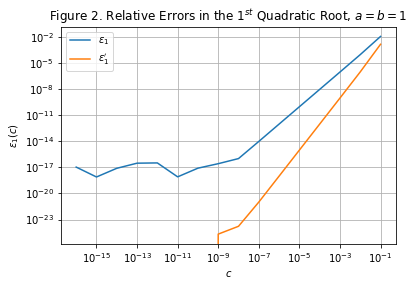

In [10]:
plt.figure()
plt.title("Figure 2. Relative Errors in the 1$^{st}$ Quadratic Root, $a=b=1$")
plt.xlabel(r'$c$')
plt.ylabel(r'$\epsilon_1(c)$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(c, epsilon1[:,0], label="$\epsilon_1$")
plt.plot(c, epsilon2[:,0], label="$\epsilon^\prime_1$")
plt.legend(loc="best")
plt.show()

As we can see, the formula in Eq. 3 is more precise in calculating the first root $x^\prime_1$, as its corresponding relative error $\epsilon^\prime_1$ is consistently smaller than $\epsilon_1$ and decreases faster for smaller values of $c$. This makes sense since, for Eq. 2, the first root $x_1$ becomes _subtractive_ in the numerator, whereas the same root $x^\prime_1$ in Eq. 3 becomes _additive_ in the denominator, for $b=1$ or $b>0$.

We notice that our measure of $\epsilon^\prime_1(c)$ is measureable down to $\sim10^{-24}$. This stems from Eq. 11, where our "theoretical" first root is $x^\prime_1 = \frac{-c}{1-c}$. Since this denominator _rounds-off_ to unity for $c \leq 10^{-16}$, the machine precision associated with the _overall division_, i.e., $\frac{-c}{1}$, is limited only by the precision in storing $c$. Thus, we can store very precise and _distinct_ values of $x^\prime_1$ smaller than $10^{-16}$.

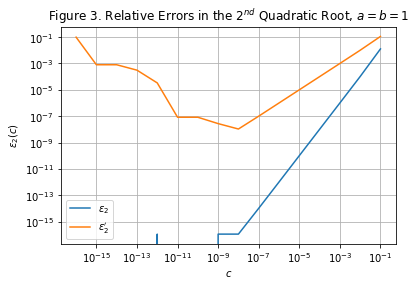

In [11]:
plt.figure()
plt.title("Figure 3. Relative Errors in the 2$^{nd}$ Quadratic Root, $a=b=1$")
plt.xlabel(r'$c$')
plt.ylabel(r'$\epsilon_2(c)$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(c, epsilon1[:,1], label="$\epsilon_2$")
plt.plot(c, epsilon2[:,1], label="$\epsilon^\prime_2$")
plt.legend(loc="best")
plt.show()

Meanwhile, for the second root, the _converse_ is the case: $x_2$ in Eq. 2 is _additive_ in the numerator, and $x^\prime_2$ in Eq. 3 is _subtractive_ in the denominator, for $b>0$. This time, Eq. 2's corresponding error $\epsilon_2$ is consistently smaller.

We also notice that our measure of $\epsilon_2(c)$ can be no more accurate than $\sim10^{-16}$. This is because in Eq. 10 our "theoretical" second root, $x_2 = c - 1$, itself reaches machine precision for values of $c \approx 10^{-16}$, typical of the round-off errors associated with machine addition and subtraction.

### C. Extending Precision
In part B., we measured and verified our suspicion that the error in subtractive cancelation will tend to dominate for "two" of the "four" real roots provided by Eqs. 2 and 3, depending on the sign of $b$. Specifically, we confirmed that, for machine computation,

- If $b > 0$, then $x^\prime_1$ and $x_2$ yield the most precise results.
- And, conversely, if $b < 0$, then $x_1$ and $x^\prime_2$ yield the most precise results.

Thus, we can extend our two functions&mdash;or instead combine them with some extra logic&mdash;to always yield the most precise, real roots for arbitrary coefficients $a, b,$ and $c$.

In [12]:
def quadroots(c):
    """
    Return the most precise, real roots of a quadratic with real coefficients given in c.
    Extends `quadroots1()` and `quadroots2()` by avoiding errors due to subtractive cancellation, depending on the sign of `c[1]` (i.e., b in Eq. 1).
    
    The values in the rank-1 array `c` are real coefficients of a quadratic.
    Since p is of length 3, the quadratic is described by::

        c[0] * x**2 + c[1] * x + c[2]
    
    Parameters
    ----------
    c : array_like
        Rank-1 array with length 3 of real quadratic coefficients.
    
    Returns
    -------
    roots : ndarray
        An array containing the real roots of the quadratic.
    
    Raises
    ------
    ValueError
        When `c` is not of length 3, c[0] = 0, or the discriminant is negative (i.e., complex roots).
    
    Examples
    --------
    >>> coeff = [1, 0, -1]
    >>> quadroots1(coeff)
    [1.0, -1.0]
    """
    if c[1] > 0:
        q2 = quadroots2(c)
        roots = [q2[0]]
        if len(q2) != 1:
            roots.append(quadroots1(c)[1])
    else:
        q1 = quadroots1(c)
        roots = [q1[0]]
        if len(q1) != 1:
            roots.append(quadroots2(c)[1])
    return roots

For verification, let's calculate the relative errors again, but this time with our new extended function.

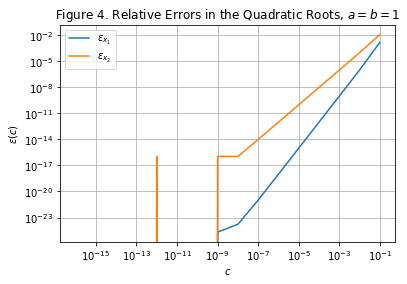

In [13]:
n = 17
c = []
epsilon = np.zeros((n-1,2))

for i in range(1,n):
    c.append(10**(-i))
    d1 = abs(theoroots2(10**(-i))[0] - quadroots([1,1,10**(-i)])[0])
    d2 = abs(theoroots1(10**(-i))[1] - quadroots([1,1,10**(-i)])[1])
    epsilon[i-1] = [d1, d2]
    
plt.figure()
plt.title("Figure 4. Relative Errors in the Quadratic Roots, $a=b=1$")
plt.xlabel(r'$c$')
plt.ylabel(r'$\epsilon(c)$')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(c, epsilon[:,0], label="$\epsilon_{x_1}$")
plt.plot(c, epsilon[:,1], label="$\epsilon_{x_2}$")
plt.legend(loc="best")
plt.show()

These plots are consistent with the smallest relative errors found in Figs. 2 and 3.